In [15]:
import requests
import pandas as pd
import time

name_list=[]
equipment_list=[]
besty_list=[]
counter_list=[]
countered_list=[]
ids_list=[]

equipment_hero={}
besty_hero={}
counter_hero={}
countered_hero={}

url="https://mapi.mobilelegends.com/hero/detail?id={}&language=en"


In [18]:

# id=111

for id in range(20,22):
    r=requests.get(url.format(id))
    data=r.json()
    if('name' not in data['data'].keys() ):
        continue
    name_list.append(data['data']['name'])
    temp=[]
    for equip in data['data']['gear']['out_pack']:
        if(equip['equip']!=None):
            equipment_hero[id]=[equip['equipment_id'],equip['equip']['name'],equip['equip']['icon'] ]
            temp.append(equip['equip']['name'])
    equipment_list.append(temp)

    if(data['data']['counters']['best']['heroid']!=None):
        besty_hero[id]=  [data['data']['counters']['best']['heroid'],data['data']['counters']['best']['name'],data['data']['counters']['best']['icon']]
        besty_list.append([data['data']['counters']['best']['name']]+data['data']['counters']['best']['best_mate_tips'].split(','))

    else:
        besty_hero[id]=data['data']['counters']['best']['best_mate_tips'].split(',')
        besty_list+=(data['data']['counters']['best']['best_mate_tips'].split(','))
        
    if(data['data']['counters']['counters']['heroid']!=None):
        counter_hero[id]=[data['data']['counters']['counters']['heroid'],data['data']['counters']['counters']['name'],data['data']['counters']['counters']['icon']]
        counter_list.append([data['data']['counters']['counters']['name']]+data['data']['counters']['counters']['restrain_hero_tips'].split(',')) 
            

    else:
        counter_hero[id]=data['data']['counters']['counters']['restrain_hero_tips'].split(',')
        counter_list+=data['data']['counters']['counters']['restrain_hero_tips'].split(',')
    if(data['data']['counters']['countered']['heroid']!=None):  
        countered_hero[id]=[data['data']['counters']['countered']['heroid'],data['data']['counters']['countered']['name'],data['data']['counters']['countered']['icon']]
        countered_list.append([data['data']['counters']['countered']['name']]+ data['data']['counters']['countered']['by_restrain_tips'].split(',')) 

    else:
        countered_hero[id]=data['data']['counters']['countered']['by_restrain_tips'].split(',')
        countered_list+= data['data']['counters']['countered']['by_restrain_tips'].split(',')
    ids_list.append(id)
    time.sleep(3)


In [19]:
print(counter_list)
print(besty_list)
l=[1,2,4]+[5]
print(l)


[['Cyclops', 'You can block each and every single attack so he is generally not a huge threat.'], ['Harley', 'Harley has no disables', ' no stuns', " just nothing! Don't hestitate to attack him at all. As long as he is not with his teammates", " take the chance and kill him with your ultimate. He also can't run from you too as you too can teleport like harley."]]
[['Roger', 'Laning with him is really good because you both have crowd control and damage to kill anyone.'], ['Zilong', 'Zilong can move displace the enemy and both of you can proceed to burst down the enemy. Zilong and Hayabusa are really dangerous at ambushing as both of them can deal massive damage quickly']]
[1, 2, 4, 5]


In [7]:
# df=pd.read_json('./cut/ARflutter/MyApp/fluuter_ar/data.json',)
df=pd.DataFrame()
df['id']=ids_list
df['name']=name_list
df['equip']=equipment_list
df['besty_hero']=besty_list
df['counter_hero']=counter_list
df['countered_hero']=countered_list

In [54]:
import requests
import pandas as pd
import time

# name_list=[]
# equipment_list=[]
# besty_list=[]
# counter_list=[]
# countered_list=[]
# ids_list=[]
type_list=[]
# equipment_hero={}
# besty_hero={}
# counter_hero={}
# countered_hero={}

url="https://mapi.mobilelegends.com/hero/detail?id={}&language=en"

# id=111

for id in range(1,121):
    r=requests.get(url.format(id))
    data=r.json()
    if('name' not in data['data'].keys() ):
        continue
    type_list.append(data['data']['type'])
    time.sleep(1)


In [56]:
df['type']=type_list
df.to_csv('./data_23.csv',index=False)

In [185]:
import pandas as pd
import json
# with open('./data_mlbb.json','r') as file:
#     j=json.load(file)

# print(j['hero'])
df=pd.read_csv('./data_23.csv',index_col='id')
print(list(df['name'].head(20)))
print(list(df['besty_hero'].head(20)))

['Miya', 'Balmond', 'Saber', 'Alice', 'Nana', 'Tigreal', 'Alucard', 'Karina', 'Akai', 'Franco', 'Bane', 'Bruno', 'Clint', 'Rafaela', 'Eudora', 'Zilong', 'Fanny', 'Layla', 'Minotaur', 'Lolita']
['Lolita', 'Nana', 'Harley', 'Aurora', 'Aurora', 'Gord', 'Aurora', 'Diggie', 'Saber', 'Odette', 'Zhask', 'Ruby', 'Aurora', 'Miya', 'Zilong', 'Eudora', 'Grock', 'Franco', 'Miya', 'Roger']


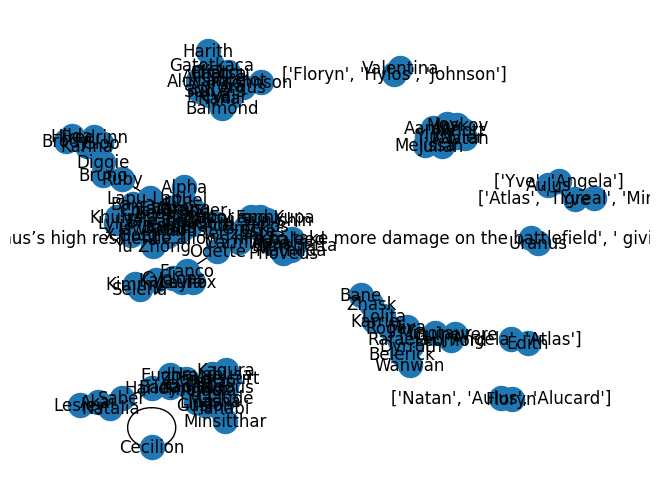

In [168]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'name', 'besty_hero')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [167]:
df[df['besty_hero']=="['']"]['besty_hero']=None

C:\Users\salmu\AppData\Local\Temp\ipykernel_13648\938221272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['besty_hero']=="['']"]['besty_hero']=None


In [122]:
import numpy as np
import ast
# df.equip=df.equip.apply(lambda x: eval(x) )
df.id.astype(int)
df['besty_hero']=df[df['besty_hero']=="['']"]['besty_hero']
print(df[df['besty_hero']=="['']"]['besty_hero'])
print(df)

Series([], Name: besty_hero, dtype: float64)
      id      name                                              equip   
0      1      Miya  [Corrosion Scythe, Swift Boots, Demon Hunter S...  \
1      2   Balmond  [Cursed Helmet, Warrior Boots, War Axe, Bloodl...   
2      3     Saber  [Blade of the Heptaseas, Ice Hunter's Magic Sh...   
3      4     Alice  [Clock of Destiny, Demon Shoes, Ice Queen Wand...   
4      5      Nana  [Enchanted Talisman, Magic Shoes, Genius Wand,...   
..   ...       ...                                                ...   
114  115    Xavier  [Enchanted Talisman, Arcane Boots, Glowing Wan...   
115  116    Julian  [Clock of Destiny, Magic Shoes, Genius Wand, B...   
116  117  Fredrinn  [Warrior Boots, Bloodlust Axe, Cursed Helmet, ...   
117  118       Joy  [Genius Wand, Arcane Boots, Ice Queen Wand, Fl...   
118  120    Arlott  [Endless Battle, Warrior Boots, Blade of Despa...   

     besty_hero counter_hero countered_hero      type  
0           NaN       

In [53]:
df['countered_hero'].explode().value_counts()
df[ df['countered_hero']=='Saber']

,id,name,equip,besty_hero,counter_hero,countered_hero
12,13,Clint,"[Endless Battle, Magic Shoes, Berserker's Fury...",Aurora,Balmond,Saber
22,23,Gord,"[Glowing Wand, Demon Shoes, Ice Queen Wand, Ge...",Grock,Miya,Saber
38,39,Roger,"[Windtalker, Ice Hunter's Swift Boots, Endless...",Rafaela,Hayabusa,Saber
52,53,Lesley,"[Berserker's Fury, Magic Shoes, Windtalker, Bl...",Akai,Odette,Saber
60,61,Chang'e,"[Enchanted Talisman, Arcane Boots, Ice Queen W...",Tigreal,Jawhead,Saber
62,63,Selena,"[Clock of Destiny, Flame Hunter's Demon Shoes,...",Kaja,Layla,Saber
77,78,Khufra,"[Cursed Helmet, Warrior Boots - Conceal, Oracl...",Vale,Fanny,Saber
85,86,Lylia,"[Enchanted Talisman, Magic Shoes, Ice Queen Wa...",Vale,Layla,Saber


In [16]:
import requests
import time
import json


hero_list=[]
url="https://mapi.mobilelegends.com/hero/detail?id={}&language=en"


for id in range(1,121):
    r=requests.get(url.format(id))
    data=r.json()
    hero={}

    if('name' not in data['data'].keys()):
        continue
    hero['id']=id
    hero['name']=data['data']['name']
    hero['type']=data['data']['type']
    hero['skills']=data['data']['skill']
    hero['gear']={}
    equipment_list=[]
    for equip in data['data']['gear']['out_pack']:
        if(equip['equip']!=None):
            equipment_list.append(equip)
    hero['gear']['equipments']=equipment_list
    hero['gear']['tips']=data['data']['gear']['out_pack_tips']
    hero['besty']=data['data']['counters']['best']
    hero['counter']=data['data']['counters']['counters']
    hero['countered_by']=data['data']['counters']['countered']
    hero_list.append(hero)
    time.sleep(3)
    

d={}
d['hero']=hero_list
data_json=json.dumps(d,indent=4)

with open('./data_mlbb.json','w') as file:
    file.write(data_json)


In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver

url = "https://m.mobilelegends.com/en/hero/98/gear"
browser = webdriver.Chrome()

browser.get(url)
html = browser.page_source
soup = BeautifulSoup(html, features='html.parser')


In [ ]:

print(soup.prettify())